# <center> Modelo de aprobación de prestamos

## Datos y variables

Existen varias variables que puedes considerar para determinar si un préstamo será autorizado o no. Aquí hay algunas variables comunes utilizadas en modelos de clasificación de préstamos:

1. Ingresos: El nivel de ingresos del solicitante puede ser un factor importante. Generalmente, un mayor nivel de ingresos indica una mayor capacidad para pagar el préstamo.

2. Historial crediticio: El historial crediticio del solicitante es una variable clave. Esto incluye factores como el puntaje crediticio, la existencia de pagos atrasados, la cantidad de deudas pendientes y la duración del historial crediticio. Un buen historial crediticio aumenta las posibilidades de aprobación del préstamo.

3. Relación deuda-ingresos (DTI): La relación deuda-ingresos es el porcentaje de los ingresos mensuales que se destina al pago de deudas existentes. Un DTI más bajo indica una mayor capacidad para asumir nuevas deudas y puede ser favorable para la aprobación del préstamo.

4. Estabilidad laboral: La estabilidad laboral y la historia de empleo del solicitante pueden ser consideradas. Un empleo estable y de larga duración muestra una mayor seguridad financiera y capacidad de pago.

5. Tipo de empleo: El tipo de empleo del solicitante también puede influir en la aprobación del préstamo. Algunos prestamistas pueden tener preferencias o requisitos específicos según el tipo de empleo (por ejemplo, empleo permanente, autónomo, contrato, etc.).

6. Monto del préstamo: El monto del préstamo solicitado también puede ser un factor a considerar. Algunos prestamistas pueden tener límites específicos o políticas de préstamos según el monto solicitado.

7. Garantía o colateral: Si el préstamo está respaldado por una garantía o colateral, como una propiedad o un vehículo, esto puede aumentar las posibilidades de aprobación, ya que proporciona seguridad adicional al prestamista.

Estas son solo algunas de las variables comunes utilizadas en modelos de clasificación de préstamos. Sin embargo, es importante tener en cuenta que los criterios y las variables utilizadas pueden variar entre instituciones financieras y dependiendo del contexto específico del préstamo. Además, la importancia relativa de cada variable puede diferir según las políticas y los criterios de evaluación de riesgos de cada prestamista.

## Generación de datos ficticios

Basados en estadisticas tomadas a un banco 

In [15]:
import pandas as pd
import numpy as np

# Generar datos aleatorios
np.random.seed(42)

# Crear un DataFrame con las variables
datos = pd.DataFrame({
    'Ingresos': np.random.uniform(2000, 8000, size=50),
    'Historial_Crediticio': np.random.choice(['Bueno', 'Malo'], size=50),
    'Relacion_DTI': np.random.uniform(0.2, 0.8, size=50),
    'Estabilidad_Laboral': np.random.choice(['Estable', 'Inestable'], size=50),
    'Tipo_Empleo': np.random.choice(['Permanente', 'Contrato', 'Autónomo'], size=50),
    'Monto_Prestamo': np.random.uniform(10000, 50000, size=50),
    'Prestamo_Otorgado': np.random.choice(['S', 'N'], size=50)
})

# Visualizar los datos generados
print(datos.head())


      Ingresos Historial_Crediticio  Relacion_DTI Estabilidad_Laboral  \
0  4247.240713                Bueno      0.637404           Inestable   
1  7704.285838                 Malo      0.662762             Estable   
2  6391.963651                 Malo      0.244427           Inestable   
3  5591.950905                 Malo      0.415079             Estable   
4  2936.111843                 Malo      0.269521             Estable   

  Tipo_Empleo  Monto_Prestamo Prestamo_Otorgado  
0  Permanente    49286.733733                 N  
1  Permanente    30665.435651                 S  
2    Autónomo    20433.166993                 N  
3    Contrato    49850.147990                 S  
4    Contrato    48616.774052                 N  


Ahora con esos datos quisiera entrenar un modelo y verficar si un jóven de 25 años, con:
* Ingresos estables
* Historial_crediticio - Bueno
* Estabilidad_Laboral - Inestable
* Tipo_Empleo - Autonomo 
y que pide lo mínimo prestado podria obtenerlo

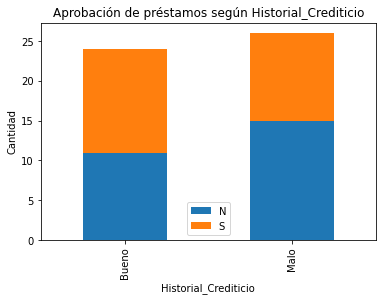

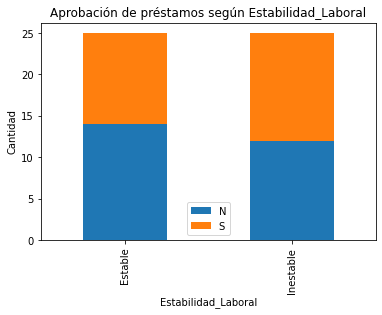

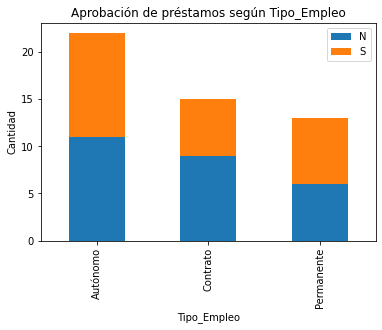

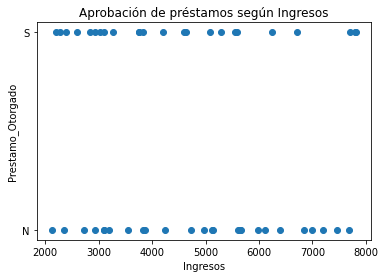

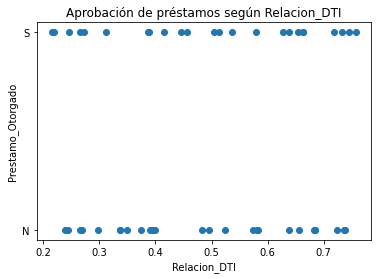

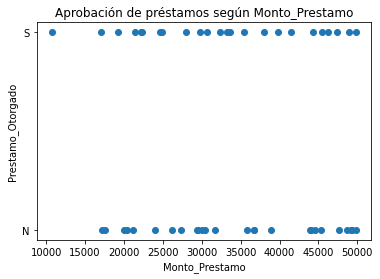

In [16]:

import matplotlib.pyplot as plt

# Gráfico de barras para variables categóricas
variables_categoricas = ['Historial_Crediticio', 'Estabilidad_Laboral', 'Tipo_Empleo']

for variable in variables_categoricas:
    grouped = datos.groupby([variable, 'Prestamo_Otorgado']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.title('Aprobación de préstamos según ' + variable)
    plt.legend(['N', 'S'])
    plt.show()

# Gráfico de dispersión para variables numéricas
variables_numericas = ['Ingresos', 'Relacion_DTI', 'Monto_Prestamo']

for variable in variables_numericas:
    plt.scatter(datos[variable], datos['Prestamo_Otorgado'])
    plt.xlabel(variable)
    plt.ylabel('Prestamo_Otorgado')
    plt.title('Aprobación de préstamos según ' + variable)
    plt.show()

In [17]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Cargar los datos desde el archivo CSV
datos 

# Dividir los datos en características (X) y etiquetas (y)
X = datos.drop('Prestamo_Otorgado', axis=1)
y = datos['Prestamo_Otorgado']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos
categoricas = ['Historial_Crediticio', 'Estabilidad_Laboral', 'Tipo_Empleo']
numericas = ['Ingresos', 'Relacion_DTI', 'Monto_Prestamo']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categoricas),
        ('num', StandardScaler(), numericas)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Construir el modelo de clasificación (Random Forest)
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Realizar la predicción para el joven de 25 años con características específicas
nuevo_solicitante = pd.DataFrame({
    'Ingresos': [3000], # Este dato no fue dado pero dice que estables podrias ampliar a un espectro mpas alto por ejemplo la media de lo que janan los jovenes de esa edad
    'Historial_Crediticio': ['Bueno'],
    'Relacion_DTI': [0.5],
    'Estabilidad_Laboral': ['Inestable'],
    'Tipo_Empleo': ['Autónomo'],
    'Monto_Prestamo': [10000]
})

nuevo_solicitante_preprocesado = preprocessor.transform(nuevo_solicitante)

prediccion = modelo.predict(nuevo_solicitante_preprocesado)

if prediccion[0] == 'S':
    print("El préstamo sería otorgado.")
else:
    print("El préstamo no sería otorgado.")


El préstamo sería otorgado.


## Interpretación

Según mi módelo esto es muy perfecto ya que las condiciones son muy ambiguas de nuestro querido joven, sin embargo los datos pueden ser refinado gracias a las estaditicas antes tomadas por ejemplo podriamos saber si personas con caracteristicas similiares pagaraon o no sus prestamos entonces aplicar con las observaciones las probailidades permitentes

In [22]:
datos['Pago_Prestamo'] = 'Pagado'
datos['Pago_Prestamo'] = np.random.choice(['S', 'N'], size=len(datos))
datos.loc[datos['Prestamo_Otorgado'] == 'N', 'Pago_Prestamo'] = 'N'
datos

,Ingresos,Historial_Crediticio,Relacion_DTI,Estabilidad_Laboral,Tipo_Empleo,Monto_Prestamo,Prestamo_Otorgado,Pago_Prestamo
0,4247.240713,Bueno,0.637404,Inestable,Permanente,49286.733733,N,N
1,7704.285838,Malo,0.662762,Estable,Permanente,30665.435651,S,N
2,6391.963651,Malo,0.244427,Inestable,Autónomo,20433.166993,N,N
3,5591.950905,Malo,0.415079,Estable,Contrato,49850.147990,S,N
4,2936.111843,Malo,0.269521,Estable,Contrato,48616.774052,N,N
5,2935.967122,Malo,0.717862,Estable,Permanente,32331.738144,S,N
6,2348.501673,Malo,0.573979,Estable,Contrato,45305.453728,N,N
7,7197.056875,Malo,0.398539,Inestable,Contrato,17548.284334,N,N
8,5606.690070,Malo,0.238135,Inestable,Autónomo,21154.854104,N,N
9,6248.435467,Bueno,0.386589,Estable,Autónomo,38014.313199,S,S


Extraigamos nuestros datos de los clientes que si han pagado

In [29]:
datos_pagados = datos[datos['Pago_Prestamo'] == 'S']
datos_pagados


,Ingresos,Historial_Crediticio,Relacion_DTI,Estabilidad_Laboral,Tipo_Empleo,Monto_Prestamo,Prestamo_Otorgado,Pago_Prestamo
9,6248.435467,Bueno,0.386589,Estable,Autónomo,38014.313199,S,S
11,7819.459113,Bueno,0.637764,Inestable,Autónomo,44252.971675,S,S
15,3100.427059,Malo,0.271757,Inestable,Permanente,47425.399769,S,S
19,3747.374841,Bueno,0.662580,Estable,Autónomo,24891.310662,S,S
23,4198.171060,Bueno,0.215251,Inestable,Autónomo,22214.554414,S,S
29,2278.702476,Malo,0.744540,Inestable,Contrato,29755.748607,S,S
31,3023.144742,Bueno,0.446230,Inestable,Autónomo,24658.751383,S,S
32,2390.309558,Bueno,0.653331,Inestable,Autónomo,39766.820922,S,S
37,2586.032684,Bueno,0.757819,Estable,Contrato,35453.304727,S,S
39,4640.914962,Bueno,0.580042,Inestable,Autónomo,33594.833902,S,S


In [31]:
datos_pagados.shape

(11, 8)

Vaya nuestra tasa de prestamos pagados es considerablemente alta.

In [33]:
datos_no_pagados = datos[(datos['Prestamo_Otorgado'] == 'S') & (datos['Pago_Prestamo'] == 'N')]
datos_no_pagados

,Ingresos,Historial_Crediticio,Relacion_DTI,Estabilidad_Laboral,Tipo_Empleo,Monto_Prestamo,Prestamo_Otorgado,Pago_Prestamo
1,7704.285838,Malo,0.662762,Estable,Permanente,30665.435651,S,N
3,5591.950905,Malo,0.415079,Estable,Contrato,49850.147990,S,N
5,2935.967122,Malo,0.717862,Estable,Permanente,32331.738144,S,N
13,3274.034664,Malo,0.732328,Estable,Autónomo,45510.803950,S,N
16,3825.453458,Bueno,0.627947,Inestable,Contrato,41413.626045,S,N
18,4591.670112,Malo,0.536766,Estable,Contrato,33227.464857,S,N
21,2836.963164,Bueno,0.513640,Inestable,Permanente,48946.553470,S,N
22,3752.867891,Malo,0.456525,Inestable,Permanente,21356.838989,S,N
25,6711.055768,Malo,0.218858,Inestable,Permanente,27936.965719,S,N
27,5085.406630,Bueno,0.388614,Inestable,Autónomo,17037.010107,S,N


In [34]:
datos_no_pagados.shape

(13, 8)

So más los prestamos **NO** pagados que los que si, nuestro jefe debe estar enojado pero para eso estamos aquí para analizar donde estamos siendo mpas flexibles 

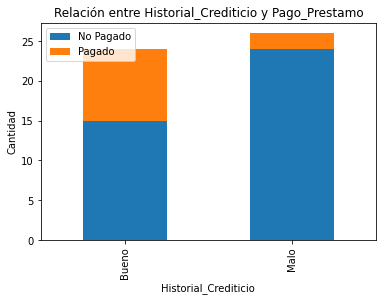

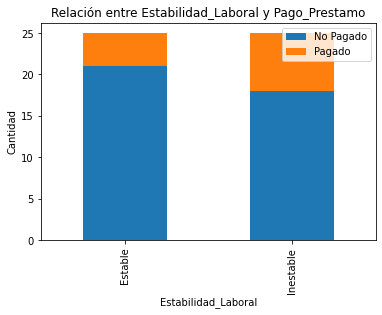

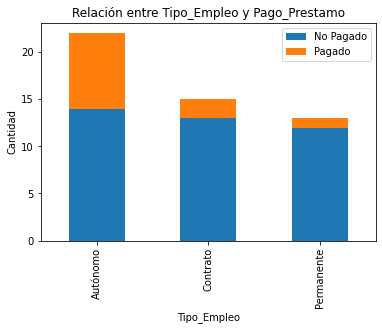

In [37]:
# Variables categóricas
variables_categoricas = ['Historial_Crediticio', 'Estabilidad_Laboral', 'Tipo_Empleo']

for variable in variables_categoricas:
    grouped = datos.groupby([variable, 'Pago_Prestamo']).size().unstack()
    grouped.plot(kind='bar', stacked=True)
    plt.xlabel(variable)
    plt.ylabel('Cantidad')
    plt.title('Relación entre ' + variable + ' y Pago_Prestamo')
    plt.legend(['No Pagado', 'Pagado'])
    plt.show()